In [248]:
%store -r __toolboxforsalesdata

In [249]:
__toolboxforsalesdata

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [250]:
monitoring_data = pd.read_csv('monitoring_data.csv')

In [251]:
monitoring_data.head()

,Model1,Model2,Model3,Model4,Ensemble_Type,Val_Prediction_Name,Test_Prediction_Name,Validation_Type,Validation Set,Validation_Score_before_clip,Validation_Score_after_clip,Public_LB_Score
0,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble,trip_ens_submission,Time_based,dropped_col_val33_no_na,22.152129,2.163706,1.17125
1,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble_sub_025,trip_ens_submission_sub_025,Time_based,dropped_col_val33_no_na,22.152377,2.160372,1.16766
2,xg_model_1_001_subsample_1,lm_model,None,None,Average,ensemble_lin_xgb,test_ensemble_lin_xgb,Time_based,dropped_col_val33_no_na,20.782377,2.151485,1.14767


In [252]:
??plt.plot

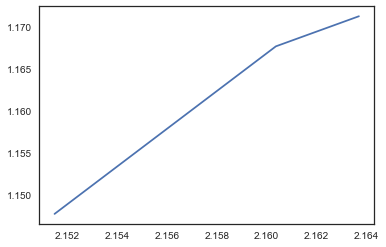

In [253]:
fig , ax = plt.subplots()
ax.plot(monitoring_data['Validation_Score_after_clip'], monitoring_data['Public_LB_Score'])
plt.show()

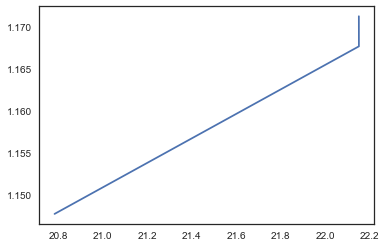

In [254]:
fig , ax = plt.subplots()
ax.plot(monitoring_data['Validation_Score_before_clip'], monitoring_data['Public_LB_Score'])
plt.show()

In [255]:
train_full = pd.read_csv('month_agg4.csv')

KeyboardInterrupt: 

In [ ]:
test_full = pd.read_csv('fake_test4.csv')

In [ ]:
train_full.head()

In [ ]:
test_full.head()

In [ ]:
#Another round for feature engineering, with KNN etc.

Taking a lag of two months. For only item, item_cat, item_shop_combo

In [ ]:
train_full.head()

In [ ]:
temp_df = train_full.copy()

In [ ]:
temp_df['unique'] = temp_df['unique'] + 2

In [ ]:
temp_df.head()

In [ ]:
lag2_item_category = temp_df.groupby(['unique','item_category_id'])['item_cnt_month'].mean().reset_index()

In [ ]:
lag2_item_shop_combo = temp_df.groupby(['unique','item_id','shop_id'])['item_cnt_month'].mean().reset_index()

In [ ]:
lag2_item_only = temp_df.groupby(['unique','item_id'])['item_cnt_month'].mean().reset_index()

In [ ]:
#Merging with train_full.

In [ ]:
train_full2 = train_full.merge(lag2_item_category, on = ['unique','item_category_id'], how = 'left')

In [ ]:
??train_full2.replace

In [ ]:
train_full2.rename(columns={'item_cnt_month_x':'item_cnt_month', 'item_cnt_month_y':'lag2_only_item_cat'}, inplace = True)

In [ ]:
train_full2.head()

In [ ]:
train_full3 = train_full2.merge(lag2_item_shop_combo, on = ['unique','shop_id','item_id'], how = 'left')

In [ ]:
train_full3.head()

In [ ]:
train_full3.rename(columns={'item_cnt_month_x':'item_cnt_month', 'item_cnt_month_y':'lag2_shop_item_comb'}, inplace = True)

In [ ]:
train_full4 = train_full3.merge(lag2_item_only, on = ['unique','item_id'], how = 'left')

In [ ]:
train_full4.head()

In [ ]:
train_full4.rename(columns={'item_cnt_month_x':'item_cnt_month', 'item_cnt_month_y':'lag2_only_item'}, inplace = True)

In [ ]:
train_full4.head()

In [ ]:
#Okay same needs to be done for test. ie. 32nd month. Done in next cell.

In [ ]:
test_full.head()

In [ ]:
for_test_lag2_item_cat = train_full[train_full['unique'] == 32].groupby('item_category_id')['item_cnt_month'].mean()

In [ ]:
sum(for_test_lag2_item_cat>100)

In [ ]:
plt.figure()
for_plot = train_full[train_full['item_category_id'] == 8 ].groupby('unique')['item_cnt_month'].mean().reset_index()
plt.plot(for_plot['unique'], for_plot['item_cnt_month'])
for_plot2 = train_full[train_full['item_category_id'] == 9 ].groupby('unique')['item_cnt_month'].mean().reset_index()
plt.plot(for_plot2['unique'], for_plot2['item_cnt_month'])
plt.show()

In [ ]:
#train_full[train_full['item_category_id']==1].groupby(['unique'])['item_cnt_month'].sum().reset_index()
train_full[train_full['item_category_id']==8]

In [ ]:
len(train_full4)

In [ ]:
plt.figure()
for_plot = train_full.groupby(['item_category_id','unique'])['item_cnt_month'].mean().reset_index()
g = sns.FacetGrid(for_plot,row="item_category_id")
g = g.map(plt.scatter, "unique", "item_cnt_month", edgecolor="w")
plt.show()

In [ ]:
test_full.head()

In [ ]:
train_full4.head()

In [ ]:
train_full4.columns

In [ ]:
#Correlation matrix between y and lag2
sns.set(style="white")

# Generate a large random dataset

# Compute the correlation matrix
corr = train_full4.drop(['shop_id','item_id','unique','item_price','item_category_id','is_music'], axis = 1).dropna().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,vmin= 0, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
#Monthly trend doesnt show much though ,but some seasonality
for_plot = train_full4.groupby(['unique'])['item_cnt_month'].mean()
for_plot = for_plot.reset_index()
plt.figure(1)
plt.plot(for_plot['unique'],for_plot['item_cnt_month'])

In [ ]:
??seasonal_decompose

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_mean
series = for_plot['item_cnt_month']
result = seasonal_decompose(series.values, model='additive', freq = 3)
result.plot()
plt.show()
#Concatenating seasonal component with frequency 3.
make_dict = {}
for i in range(0,34):
    make_dict[i] = result.seasonal[i]
train_full4['seasonal_freq_3_feature'] = train_full4['unique'].map(make_dict)

## Prediction zone continued

In [ ]:
#Training for an estimate with new features, lag1,lag2, season3.
train_lag1_lag2_season,val_lag1_lag2_season = month_split(train_full4,33)

In [ ]:
dropped_train_lag1_lag2_season = train_lag1_lag2_season.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1)

In [ ]:
dropped_val_lag1_lag2_season = val_lag1_lag2_season.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1)

In [ ]:
#Training with xgboost with default parameters
xg_train = xgboost.DMatrix(dropped_train_lag1_lag2_season,label = train_lag1_lag2_season.copy()['item_cnt_month'])
xg_val = xgboost.DMatrix(dropped_val_lag1_lag2_season,label = val_lag1_lag2_season.copy()['item_cnt_month'])

In [ ]:
param_set_1_lag_2_seasonal = {'max_depth': 6, 'eta': 0.01, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 1,'eval_metric': 'rmse'}

In [ ]:
xgb_model1_set_1_lag_2_seasonal = xgboost.train(param_set_1_lag_2_seasonal , xg_train,early_stopping_rounds=10,evals = [(xg_train , "train_set"),(xg_val,"validation_set")] ,num_boost_round=1000)

In [ ]:
import pickle

In [ ]:
pickle.dump(xgb_model1_set_1_lag_2_seasonal,open("xgb_model1_set_1_lag_2_seasonal.pickle.dat", "wb"))

In [ ]:
pred_xgb_val_1_lag_2_seasonal = xgb_model1_set_1_lag_2_seasonal.predict(xgboost.DMatrix(dropped_val_lag1_lag2_season), ntree_limit=xgb_model1_set_1_lag_2_seasonal.best_ntree_limit)

In [ ]:
rmse(pred_xgb_val_1_lag_2_seasonal, val_lag1_lag2_season['item_cnt_month'])

In [ ]:
monitoring_data

In [ ]:
compute_trimmed_rmse(pred_val.copy(), val_lag1_lag2_season['item_cnt_month'].copy())

In [ ]:
train_full.head()

In [ ]:
#Saving train data.
train_full4.to_csv('train_full_lag1_lag2_season.csv')

In [ ]:
#Not tuning xgb_1_season_lag_2 but ensembling with linear model.
for_lr = train_lag1_lag2_season.dropna()
X = for_lr.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1)
y = for_lr['item_cnt_month']
lm_model_set_1_lag_2_seasonal = LinearRegression()
lm_model_set_1_lag_2_seasonal.fit(X,y)

In [ ]:
pred_lm_val_1_lag_2_seasonal = lm_model_set_1_lag_2_seasonal.predict(dropped_val_lag1_lag2_season.dropna())

In [ ]:
rmse(pred_lm_val_1_lag_2_seasonal, val_lag1_lag2_season.dropna()['item_cnt_month'])

In [ ]:
compute_trimmed_rmse(pred_lm_val_1_lag_2_seasonal.copy(), val_lag1_lag2_season.dropna()['item_cnt_month'].copy())

In [ ]:
#Ensemble validation error /2
print(rmse((pred_lm_val_1_lag_2_seasonal+xgb_model1_set_1_lag_2_seasonal.predict(xgboost.DMatrix(dropped_val_lag1_lag2_season.dropna())))/2, val_lag1_lag2_season.dropna()['item_cnt_month']))
print(compute_trimmed_rmse((pred_lm_val_1_lag_2_seasonal+xgb_model1_set_1_lag_2_seasonal.predict(xgboost.DMatrix(dropped_val_lag1_lag2_season.dropna())))/2, val_lag1_lag2_season.dropna()['item_cnt_month'].copy()))

### Making test set ready

In [ ]:
#OK, its a bomb. Making same features for test
for_test_lag2_item_cat = train_full[train_full['unique'] == 32].groupby('item_category_id')['item_cnt_month'].mean()

In [ ]:
for_test_lag2_item_shop = train_full[train_full['unique'] == 32].groupby(['item_id','shop_id'])['item_cnt_month'].mean()

In [ ]:
for_test_lag2_item_only = train_full[train_full['unique'] == 32].groupby(['item_id'])['item_cnt_month'].mean()

In [ ]:
for_test_lag2_item_cat = for_test_lag2_item_cat.reset_index()

In [ ]:
for_test_lag2_item_shop = for_test_lag2_item_shop.reset_index()

In [ ]:
for_test_lag2_item_only = for_test_lag2_item_only.reset_index()

In [ ]:
test_full2 = test_full.merge(for_test_lag2_item_cat, how = 'left', on = ['item_category_id'])

In [ ]:
test_full2.rename(columns = {'item_cnt_month':'lag2_only_item_cat'}, inplace=True)

In [ ]:
test_full3 = test_full2.merge(for_test_lag2_item_only , how = 'left', on = ['item_id'])

In [ ]:
test_full3.rename(columns = {'item_cnt_month':'lag2_only_item'}, inplace=True)

In [ ]:
test_full4 = test_full3.merge(for_test_lag2_item_shop, how = 'left', on = ['item_id','shop_id'])
#Hey you can make, item_cat, shop_id also. Try that

In [ ]:
test_full4.rename(columns = {'item_cnt_month':'lag2_shop_item_comb'}, inplace=True)

In [ ]:
test_full4['seasonal_freq_3_feature'] = -0.04751237 #What a waste. Is it so??

In [ ]:
#Saving test set for future prediction
test_full4.to_csv('test_full_lag1_lag2_seasonal.csv')

In [ ]:
test_set_for_prediction = test_full4.drop(['ID','shop_id','item_category_id','indicator','item_id'], axis = 1)

In [ ]:
test_set_for_prediction['is_music'] = test_set_for_prediction['is_music'].astype(float)

In [ ]:
features = xg_train.feature_names
test_set_for_prediction = test_set_for_prediction[features]

### Predicting on test

In [ ]:
predo = xgb_model1_set_1_lag_2_seasonal.predict(xgboost.DMatrix(test_set_for_prediction))

In [ ]:
submit = pd.DataFrame([test_full['ID'], predo]).T

In [ ]:
submit['ID'] = submit['ID'].astype(int)
submit.rename(columns={'Unnamed 0': 'item_cnt_month'}, inplace=True)

In [ ]:
submit.loc[submit['item_cnt_month'] >= 20, 'item_cnt_month'] = 20
submit.loc[submit['item_cnt_month'] <= 0, 'item_cnt_month'] = 0

In [ ]:
submit.to_csv('sep_4.csv',index=False)

In [ ]:
test_set_for_prediction_no_na = test_set_for_prediction.dropna()

In [ ]:
test_set_for_prediction_only_na = test_set_for_prediction[test_set_for_prediction.isnull().any(axis = 1)]

In [256]:
#First finding best alpha for ensembling on val set. alpha*lin + (1-alpha)*xgb
alphas = np.arange(0,1,0.001)
best_alpha = 0
best_error = compute_trimmed_rmse(pred_xgb_val_1_lag_2_seasonal.copy(),val_lag1_lag2_season['item_cnt_month'].copy())
for alpha in alphas:
    temp_pred = alpha*pred_lm_val_1_lag_2_seasonal + (1-alpha)*xgb_model1_set_1_lag_2_seasonal.predict(xgboost.DMatrix(dropped_val_lag1_lag2_season.dropna()))
    temp_error = compute_trimmed_rmse(val_lag1_lag2_season.dropna()['item_cnt_month'].copy(), temp_pred.copy())
    if (temp_error < best_error):
        best_alpha= alpha
        best_error = temp_error

In [258]:
#Predicting for no NA features(ensembles)
features = dropped_train_lag1_lag2_season.columns.values
test_set_for_prediction_no_na = test_set_for_prediction_no_na[features]
test_set_for_prediction_only_na = test_set_for_prediction_only_na[features]
xgb_predict_test = xgb_model1_set_1_lag_2_seasonal.predict(xgboost.DMatrix(test_set_for_prediction_no_na))
lm_predict_test = lm_model_set_1_lag_2_seasonal.predict(test_set_for_prediction_no_na)
pred_test_xgb_lin_0092_lag2_season = 0.092*lm_predict_test + (1-0.092)*xgb_predict_test

In [259]:
sum(test_full.index.values != test_full['ID'])

0

In [261]:
#Predicting for only NA features xgb.
pred_test_xgb_lin_0092_lag2_season_2 = xgb_model1_set_1_lag_2_seasonal.predict(xgboost.DMatrix(test_set_for_prediction_only_na))

In [262]:
index_no_na = pd.concat([pd.DataFrame(test_set_for_prediction_no_na.index.values),pd.DataFrame(pred_test_xgb_lin_0092_lag2_season)], axis = 1)

In [263]:
index_no_na.columns = ['index','item_cnt_month']

In [272]:
index_only_na = pd.concat([pd.DataFrame(test_set_for_prediction_only_na.index.values),pd.DataFrame(pred_test_xgb_lin_0092_lag2_season_2)], axis = 1)

In [273]:
index_only_na.columns = ['index','item_cnt_month']

In [274]:
index_only_na['item_cnt_month'] = 0

In [275]:
index_only_na.head(10)

,index,item_cnt_month
0,0,0
1,1,0
2,3,0
3,4,0
4,7,0
5,8,0
6,9,0
7,11,0
8,12,0
9,13,0


In [276]:
index_only_na.columns = ['index','item_cnt_month']

In [277]:
final_pred = pd.concat([index_no_na,index_only_na], axis = 0)

In [278]:
index_only_na.head(10)

,index,item_cnt_month
0,0,0
1,1,0
2,3,0
3,4,0
4,7,0
5,8,0
6,9,0
7,11,0
8,12,0
9,13,0


In [279]:
final_pred[final_pred['index'] == 202791]

,index,item_cnt_month
191628,202791,0.0


In [280]:
final_pred_sorted = final_pred.sort_values("index").copy()

In [281]:
final_pred_sorted.index = final_pred_sorted['index']

In [282]:
count = 0
for i in test_full['ID']:
    if i not in final_pred_sorted.index.values:
        print(final_pred[final_pred['index'] == i])

In [283]:
sum(test_full['ID'].values != final_pred_sorted.index.values)

0

In [284]:
final_pred_sorted.drop('index',axis = 1, inplace = True)

In [285]:
for_submit = pd.concat([test_full['ID'],final_pred_sorted], axis = 1)

In [286]:
sum(for_submit['ID'].values != for_submit.index.values)

0

In [287]:
for_submit.shape

(214200, 2)

In [288]:
for_submit.loc[for_submit['item_cnt_month']> 20, 'item_cnt_month'] = 20
for_submit.loc[for_submit['item_cnt_month']< 0, 'item_cnt_month'] = 0

In [ ]:
for_submit.to_csv('sep5.csv',index = False)

In [ ]:
min(for_submit['item_cnt_month'])

In [ ]:
max(for_submit['item_cnt_month'])

In [ ]:
for_submit_0025 = for_submit.copy()

In [ ]:
for_submit_0025['item_cnt_month'] = for_submit['item_cnt_month'] - 0.025

In [ ]:
for_submit_0025.loc[for_submit_0025['item_cnt_month']<0,'item_cnt_month'] = 0

In [ ]:
min(for_submit_0025['item_cnt_month'])

In [ ]:
max(for_submit_0025['item_cnt_month'])

In [ ]:
for_submit_0025.to_csv('sep5_less_0025.csv',index = False)

In [ ]:
for_submit_0025.shape

In [ ]:
for_submit_005 = for_submit.copy()

In [ ]:
for_submit_005['item_cnt_month'] = for_submit_0025['item_cnt_month'] - 0.025

In [ ]:
for_submit_005.loc[for_submit_005['item_cnt_month']<0,'item_cnt_month'] = 0

In [ ]:
for_submit_005.to_csv('sep5_less_005.csv', index=False)

In [ ]:
for_submit_0075 = for_submit.copy()
for_submit_0075['item_cnt_month'] = for_submit_005['item_cnt_month'] - 0.025
for_submit_0075.loc[for_submit_0075['item_cnt_month']<0,'item_cnt_month'] = 0

In [ ]:
for_submit_0075.to_csv('sep5_less_0075.csv', index=False)

In [ ]:
for_submit = pd.read_csv('sep5.csv')
for_submit_0075 = pd.read_csv('sep5_less_0075.csv')

In [ ]:
for_submit_01 = for_submit.copy()
for_submit_01['item_cnt_month'] = for_submit_0075['item_cnt_month'] - 0.025
for_submit_01.loc[for_submit_01['item_cnt_month']<0,'item_cnt_month'] = 0

In [ ]:
for_submit_01.to_csv('sep5_less_01.csv', index=False)

In [ ]:
for_submit_02 = for_submit.copy()
for_submit_02['item_cnt_month'] = for_submit_01['item_cnt_month'] - 0.1
for_submit_02.loc[for_submit_02['item_cnt_month']<0,'item_cnt_month'] = 0

In [ ]:
for_submit_02.to_csv('sep5_less_02.csv', index=False)

In [290]:
for_submit = pd.read_csv('sep5.csv')

In [291]:
for_submit_0025 = pd.read_csv('sep5_less_0025.csv')

In [292]:
for_submit_005 = pd.read_csv('sep5_less_005.csv')

In [293]:
for_submit_0075 = pd.read_csv('sep5_less_0075.csv')

In [294]:
for_submit_01 = pd.read_csv('sep5_less_01.csv')

In [295]:
#Submissions made with lag2 and season.
for_submit.head()

,ID,item_cnt_month
0,0,0.000000
1,1,0.000000
2,2,1.571729
3,3,0.000000
4,4,0.000000


In [296]:
for_submit_0025.head()

,ID,item_cnt_month
0,0,0.000000
1,1,0.000000
2,2,1.546729
3,3,0.000000
4,4,0.000000


In [297]:
for_submit_005.head()

,ID,item_cnt_month
0,0,0.000000
1,1,0.000000
2,2,1.521729
3,3,0.000000
4,4,0.000000


In [298]:
for_submit_0075.head()

,ID,item_cnt_month
0,0,0.000000
1,1,0.000000
2,2,1.496729
3,3,0.000000
4,4,0.000000


In [299]:
for_submit_01.head()

,ID,item_cnt_month
0,0,0.000000
1,1,0.000000
2,2,1.471729
3,3,0.000000
4,4,0.000000
